# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('baltimore-lmop-with-geocodes.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 38
  `GHGRP ID` `Landfill ID` `Landfill Name` State `Physical Address` City  County
       <dbl>         <dbl> <chr>           <chr> <chr>              <chr> <chr> 
1    1007291           734 Alpha Ridge SLF MD    2350 Marriottsvil… Marr… Howard
2         NA           735 Annapolis SLF   MD    Defense Highway    Anna… Anne …
3         NA           736 Appeal SLF      MD    <NA>               Lusby Calve…
4    1000331         10120 Beulah Municip… MD    6815 East New Mar… Hurl… Dorch…
# ℹ 31 more variables: `Zip Code` <dbl>, lat <dbl>, long <dbl>,
#   `Ownership Type` <chr>, `Landfill Owner Organization(s)` <chr>,
#   `Year Landfill Opened` <dbl>, `Landfill Closure Year` <dbl>,
#   `Current Landfill Status` <chr>, `Waste in Place (tons)` <dbl>,
#   `Waste in Place Year` <dbl>, `LFG Collection System In Place?` <chr>,
#   `LFG Collected (mmscfd)` <dbl>, `LFG Flared (mmscfd)` <dbl>,
#   `Project ID` <chr>, `Current Project Status` <chr>, `Project Name` <chr>, …


In [5]:
%%R

# list variables
names(df)



 [1] "GHGRP ID"                                               
 [2] "Landfill ID"                                            
 [3] "Landfill Name"                                          
 [4] "State"                                                  
 [5] "Physical Address"                                       
 [6] "City"                                                   
 [7] "County"                                                 
 [8] "Zip Code"                                               
 [9] "lat"                                                    
[10] "long"                                                   
[11] "Ownership Type"                                         
[12] "Landfill Owner Organization(s)"                         
[13] "Year Landfill Opened"                                   
[14] "Landfill Closure Year"                                  
[15] "Current Landfill Status"                                
[16] "Waste in Place (tons)"                           

[20] "LFG Flared (mmscfd)"                                    
[21] "Project ID"                                             
[22] "Current Project Status"                                 
[23] "Project Name"                                           
[24] "Project Start Date"                                     
[25] "Project Shutdown Date"                                  
[26] "Project Type Category"                                  
[27] "LFG Energy Project Type"                                
[28] "RNG Delivery Method"                                    
[29] "Actual MW Generation"                                   
[30] "Rated MW Capacity"                                      
[31] "LFG Flow to Project (mmscfd)"                           
[32] "Current Year Emission Reductions (MMTCO2e/yr) - Direct" 
[33] "Current Year Emission Reductions (MMTCO2e/yr) - Avoided"
[34] "GEOID"                                                  
[35] "STATE"                                           

In [6]:
%%R
# select variables that will show which landfill status
landfill_status <- c('Landfill Name','Current Landfill Status', 'Landfill Closure Year')

In [7]:
%%R
# group variables that will show the amount of waste in each landfill
landfill_waste <- c('Landfill Name', 'Waste in Place (tons)')

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [8]:
%%R 

# code for summary statistics
# get mean of Waste in Place (tons) for each landfill name

df %>%
    group_by(`Landfill Name`) %>%
    summarise(
        #mean_waste = mean(`Waste in Place (tons)`)
        #median_waste = median(`Waste in Place (tons)`)
        #max_waste = max(`Waste in Place (tons)`)
        #min_waste = min(`Waste in Place (tons)`)
        stdev_waste = sd(`Waste in Place (tons)`)        
        ) 



# A tibble: 41 × 2
   `Landfill Name`                                                 stdev_waste
   <chr>                                                                 <dbl>
 1 Alpha Ridge SLF                                                          NA
 2 Annapolis SLF                                                            NA
 3 Appeal SLF                                                               NA
 4 Beulah Municipal Landfill                                                NA
 5 Bowley's Lane LF                                                         NA
 6 Brown Station Road Sanitary Landfill                                      0
 7 Cecil County Central Landfill                                            NA
 8 Central SLF                                                              NA
 9 Charles County Landfill #2                                               NA
10 Eastern Sanitary Landfill Solid Waste Management Facility (ESL)           0
# ℹ 31 more rows
# ℹ Use `print(n

In [9]:
%%R
# rank landfills by waste in place (tons) highest to lowest

df %>%
    arrange(desc(`Waste in Place (tons)`)) %>%
    select(`Landfill Name`, `Waste in Place (tons)`)



# A tibble: 48 × 2
   `Landfill Name`                                        Waste in Place (tons…¹
   <chr>                                                                   <dbl>
 1 Brown Station Road Sanitary Landfill                                 19027722
 2 Brown Station Road Sanitary Landfill                                 19027722
 3 Brown Station Road Sanitary Landfill                                 19027722
 4 Quarantine Road SLF                                                  10632202
 5 Millersville SLF                                                      8748707
 6 Sandy Hill SLF                                                        8201604
 7 Sandy Hill SLF                                                        8201604
 8 Norris Farms Landfill                                                 8003870
 9 Eastern Sanitary Landfill Solid Waste Management Faci…                7971798
10 Eastern Sanitary Landfill Solid Waste Management Faci…                7971798
# ℹ 38 mo

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [10]:
%%R
# create a new column that changes values of "Current Landfill Status" such that 'Open' is 1 and 'Closed' is 0 and 'Unknown' is NA
df <- df %>%
    mutate(status = case_when(
        `Current Landfill Status` == 'Open' ~ 1,
        `Current Landfill Status` == 'Closed' ~ 0,
        TRUE ~ NA_real_
    ))

df %>% head(4)

# A tibble: 4 × 39
  `GHGRP ID` `Landfill ID` `Landfill Name` State `Physical Address` City  County
       <dbl>         <dbl> <chr>           <chr> <chr>              <chr> <chr> 
1    1007291           734 Alpha Ridge SLF MD    2350 Marriottsvil… Marr… Howard
2         NA           735 Annapolis SLF   MD    Defense Highway    Anna… Anne …
3         NA           736 Appeal SLF      MD    <NA>               Lusby Calve…
4    1000331         10120 Beulah Municip… MD    6815 East New Mar… Hurl… Dorch…
# ℹ 32 more variables: `Zip Code` <dbl>, lat <dbl>, long <dbl>,
#   `Ownership Type` <chr>, `Landfill Owner Organization(s)` <chr>,
#   `Year Landfill Opened` <dbl>, `Landfill Closure Year` <dbl>,
#   `Current Landfill Status` <chr>, `Waste in Place (tons)` <dbl>,
#   `Waste in Place Year` <dbl>, `LFG Collection System In Place?` <chr>,
#   `LFG Collected (mmscfd)` <dbl>, `LFG Flared (mmscfd)` <dbl>,
#   `Project ID` <chr>, `Current Project Status` <chr>, `Project Name` <chr>, …


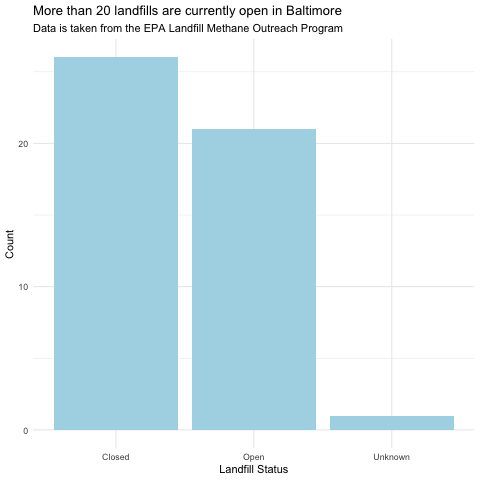

In [11]:
%%R

# code for plot 1
# make sure to make a meaningful title and subtitle

# show values of Current Landfill Status
df %>%
    ggplot(aes(x = `Current Landfill Status`)) +
    geom_bar(fill = 'light blue') +
    labs(title = 'More than 20 landfills are currently open in Baltimore', subtitle = 'Data is taken from the EPA Landfill Methane Outreach Program') +
    xlab('Landfill Status') +
    ylab('Count') +
    theme_minimal()






    

In [12]:
%%R

# change values of 'Ownership Type' such that 'Public' is 1 and 'Private' is 0 and 'Unknown' is NA
df <- df %>%
    mutate(ownership = case_when(
        `Ownership Type` == 'Public' ~ 1,
        `Ownership Type` == 'Private' ~ 0,
        TRUE ~ NA_real_
    ))

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1 rows containing missing values (`geom_point()`). 



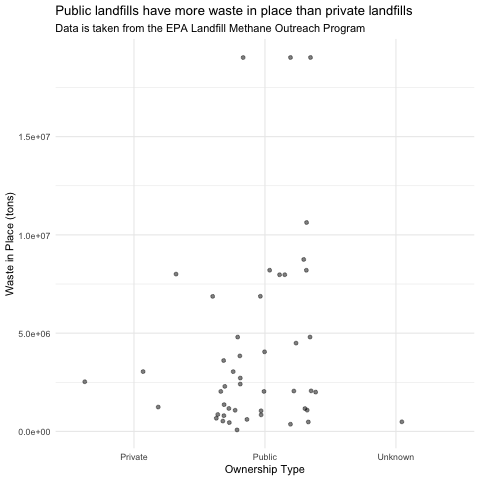

In [13]:
%%R
# code for plot 2
# make sure to make a meaningful title and subtitle

# show ownership type as a jitter plot
df %>%
    ggplot(aes(x = `Ownership Type`, y = `Waste in Place (tons)`)) +
    geom_jitter(alpha = 0.5) +
    labs(title = 'Public landfills have more waste in place than private landfills', subtitle = 'Data is taken from the EPA Landfill Methane Outreach Program') +
    xlab('Ownership Type') +
    ylab('Waste in Place (tons)') +
    theme_minimal()





In [14]:
%%R

# change values of 'Current Project Status' such that 'Operational' is 3 and 'Low Potential' is 1, 'Candidate' is 2, and 'Shutdown' is 0 and 'Unknown' is NA
df <- df %>%
    mutate(project_status = case_when(
        `Current Project Status` == 'Operational' ~ 3,
        `Current Project Status` == 'Low Potential' ~ 1,
        `Current Project Status` == 'Candidate' ~ 2,
        `Current Project Status` == 'Shutdown' ~ 0,
        TRUE ~ NA_real_
    ))

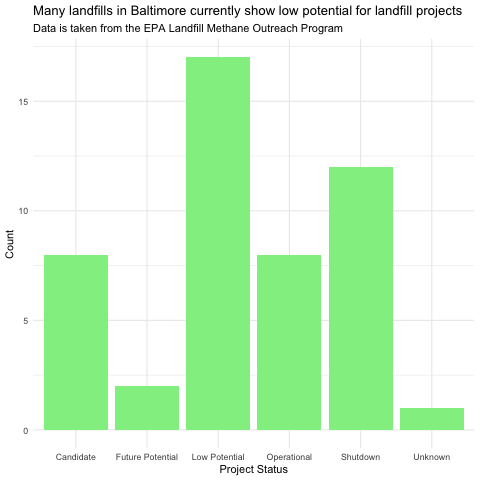

In [15]:
%%R

# code for plot 3
# make sure to make a meaningful title and subtitle

# bar plot of project status
df %>%
    ggplot(aes(x = `Current Project Status`)) +
    geom_bar(fill = 'light green') +
    labs(title = 'Many landfills in Baltimore currently show low potential for landfill projects', subtitle = 'Data is taken from the EPA Landfill Methane Outreach Program') +
    xlab('Project Status') +
    ylab('Count') +
    theme_minimal()

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1 rows containing missing values (`position_stack()`). 



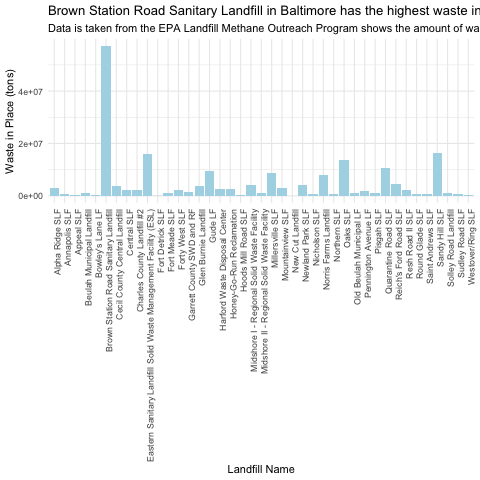

In [16]:
%%R

# code for plot 1
# make sure to make a meaningful title and subtitle

# plot Waste in Place (tons) per Landfill Name using a bar plot

df %>%
    ggplot(aes(x = `Landfill Name`, y = `Waste in Place (tons)`)) +
    geom_bar(stat = 'identity', fill = 'light blue') +
    labs(title = 'Brown Station Road Sanitary Landfill in Baltimore has the highest waste in place (tons)', subtitle = 'Data is taken from the EPA Landfill Methane Outreach Program shows the amount of waste in each landfill in Baltimore') +
    xlab('Landfill Name') +
    ylab('Waste in Place (tons)') +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2 rows containing missing values (`position_stack()`). 



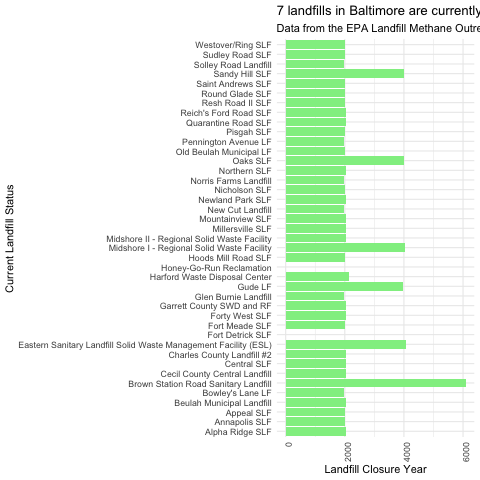

In [17]:
%%R
# code for plot 2
# make sure to make a meaningful title and subtitle

# plot landfill closure year and current landfill status using a bar plot

df %>%
    ggplot(aes(x = `Landfill Closure Year`, y = `Landfill Name`)) +
    geom_bar(stat = 'identity', fill = 'light green') +
    labs(title = '7 landfills in Baltimore are currently open', subtitle = 'Data from the EPA Landfill Methane Outreach Program shows how long each landfill is allowed to operate') +
    xlab('Landfill Closure Year') +
    ylab('Current Landfill Status') +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))


Error in `geom_density()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Accuracy Score' not found
Run `rlang::last_trace()` to see where the error occurred.


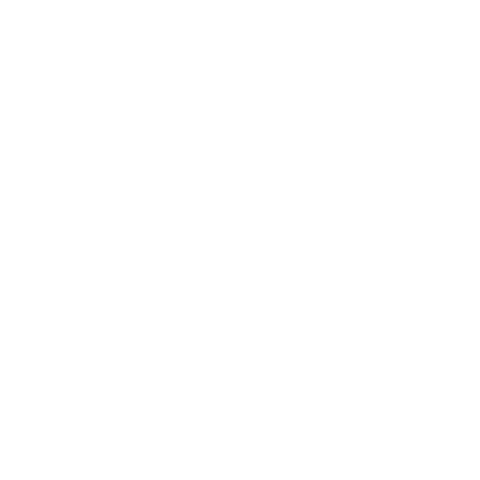

RRuntimeError: Error in geom_density(alpha = 0.5) : 
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Accuracy Score' not found


In [18]:
%%R

# code for plot 3
# make sure to make a meaningful title and subtitle

# plot accuracy score of each landfill by ownership type using density plot

df %>%
    ggplot(aes(x = `Accuracy Score`, fill = `Ownership Type`)) +
    geom_density(alpha = 0.5) +
    labs(title = 'Public landfills in Baltimore have higher accuracy scores than private landfills', subtitle = 'Data from the EPA Landfill Methane Outreach Program shows the accuracy score of landfills by ownership') +
    xlab('Accuracy Score') +
    ylab('Density') +
    theme_minimal()